In [5]:
# allow to reload module
import importlib

%load_ext autoreload
%autoreload 2

import beaf.brw_recording as br
import beaf.brw_experiment_settings as be


In [28]:
Info = be.get_brw_experiment_setting("../recordings/hippo_slice3-gabazine11.brw")

print(Info.get_mea_model())
print(Info.get_recording_type())
print(Info.get_nb_channel())
print(Info.get_sampling_rate())
print(Info.get_recording_length())
print(Info.get_recording_length_sec())

Accura_3D
RawDataSettings
4096
19753.775390625
429606
21.748045196660883


Reading chunk 2 out of 2
done


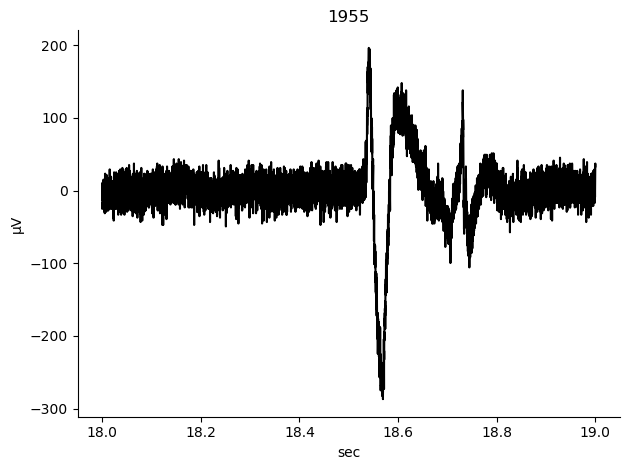

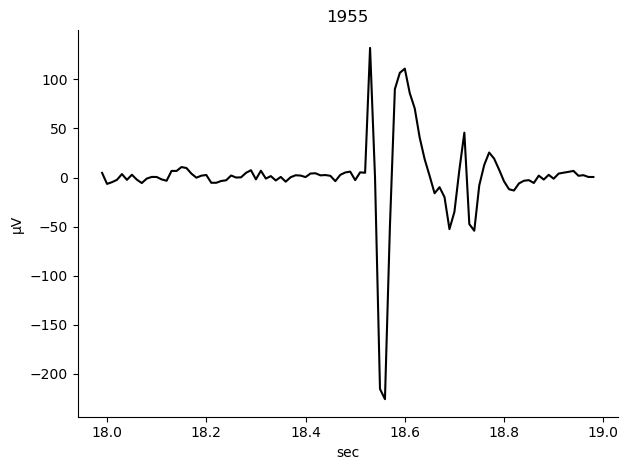

In [46]:
%autoreload 2

Recording = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18, t_end=19, ch_to_extract=[1955], frame_chunk = 10000, verbose=True)

Recording.plot_raw([1955])
Recording.down_sample(100, [1955], overwrite=True)
Recording.plot_raw([1955])


2 data chunks to read


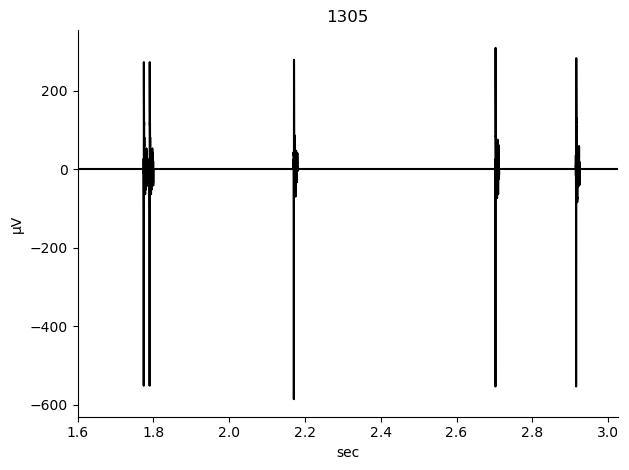

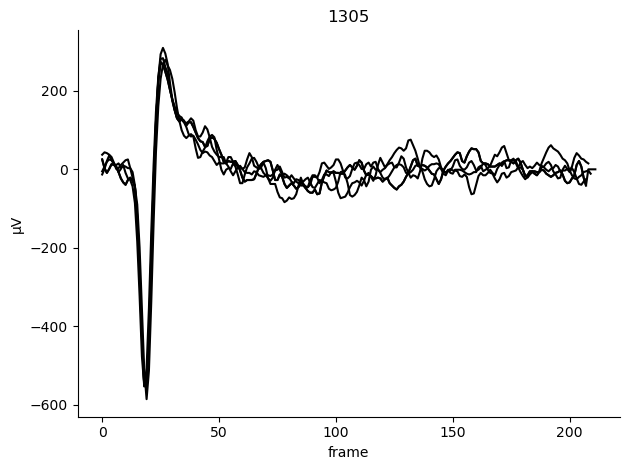

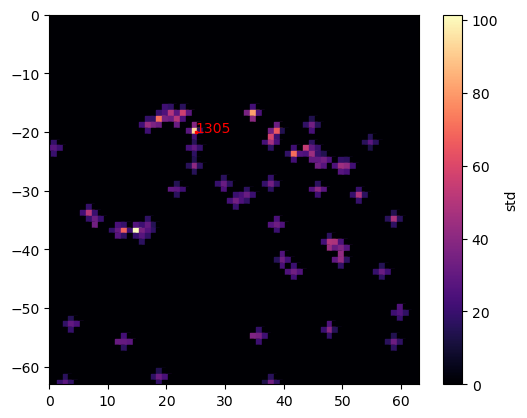

In [58]:
start = 1.6
stop = 2.95

Recording = br.read_brw_recording("../recordings/cerebellum-slice1-01.brw", t_start=start, t_end=stop, ch_to_extract="all")

Recording.plot_raw([1305], visualisation="reconstructed", t_start=start, t_end="all")
Recording.plot_raw([1305], visualisation="superimposed", t_start=start, t_end="all")

Recording.plot_activity_map(label=[1305], method="std", cmap="magma", flip=True)

In [105]:
import time, psutil
import numpy as np

t_start = 1
t_end = 2

if 'Recording' in locals():
    del(Recording)

mem_pre = np.round(psutil.virtual_memory().available / 1073741824, 2)    

tstart = time.time()
Recording = br.read_brw_recording("../recordings/5s_rec_raw.brw", t_start = t_start, t_end = t_end, ch_to_extract="all", verbose=True)
runtime = time.time()-tstart

mem_post = np.round(psutil.virtual_memory().available / 1073741824, 2)

print(mem_pre, "Go of available memory before Recording creation")
print(mem_post, "Go of available memory after Recording creation")
print(round(mem_pre-mem_post, 2), "Go of memory used for a", np.round(t_end-t_start, 2), "sec recording")

print(np.round(runtime, 2), "sec to run", "("+str(np.round(runtime/60, 2)), "min)")

Reading chunk 1 out of 1
done
21.31 Go of available memory before Recording creation
18.32 Go of available memory after Recording creation
2.99 Go of memory used for a 1 sec recording
233.18 sec to run (3.89 min)


Reading chunk 1 out of 1
done
Reading chunk 1 out of 1
done
Reading chunk 1 out of 1
done
Reading chunk 1 out of 1
done
Reading chunk 1 out of 1
done


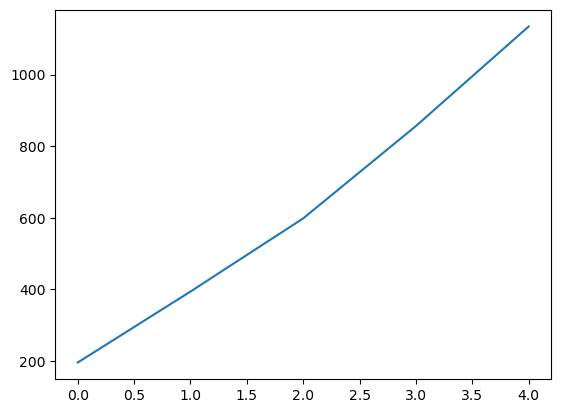

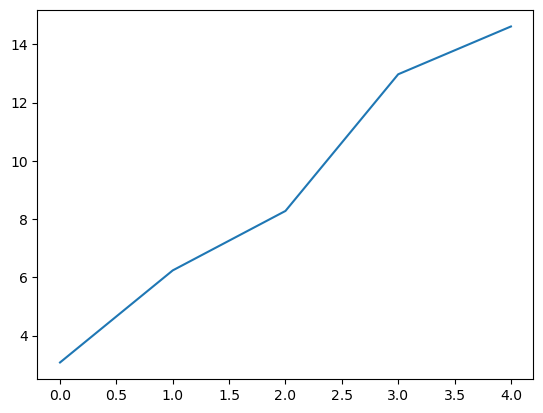

In [108]:
import time, psutil
import numpy as np
import matplotlib.pyplot as plt

results = [[], []]
for t_end in range(1, 6):
    if 'Recording' in locals():
        del(Recording)

    mem_pre = np.round(psutil.virtual_memory().available / 1073741824, 2)
    tstart = time.time()
    Recording = br.read_brw_recording("../recordings/5s_rec_raw.brw", t_start=0, t_end=t_end, ch_to_extract="all", verbose=True)
    runtime = time.time()-tstart

    mem_post = np.round(psutil.virtual_memory().available / 1073741824, 2)

    results[0].append(np.round(runtime, 2))
    results[1].append(np.round(mem_pre-mem_post, 2))

plt.plot(results[0])
plt.show()
plt.plot(results[1])
plt.show()

In [24]:
import time, psutil
import numpy as np

import beaf.brw_recording as br

t_start = 1
t_end = 2

runtimes = []
memory_use = []

for i in range(0, 3):
    if 'Recording' in locals():
        del(Recording)

    mem_pre = np.round(psutil.virtual_memory().available / 1073741824, 2)
    tstart = time.time()
    Recording = br.read_brw_recording("../recordings/5s_rec_raw.brw", t_start = t_start, t_end = t_end, ch_to_extract="all", verbose=False, multiproc=False)
    runtime = time.time()-tstart
    mem_post = np.round(psutil.virtual_memory().available / 1073741824, 2)
    
    runtimes.append(runtime)
    memory_use.append(np.round(mem_pre-mem_post, 2))

    print(np.round(runtime, 2), "sec to run", "("+str(np.round(runtime/60, 2)), "min)")
    print("memory usage:", np.round(mem_pre-mem_post, 2), "Go")

print("    --------\naverage runtime:", np.round(np.mean(runtimes)/60, 2), "min")
print("average memory usage:", np.round(np.mean(memory_use), 2), "Go")


print("\n-------- multiproc --------")

runtimes = []
memory_use = []

for i in range(0, 3):
    if 'Recording' in locals():
        del(Recording)

    mem_pre = np.round(psutil.virtual_memory().available / 1073741824, 2)
    tstart = time.time()
    Recording = br.read_brw_recording("../recordings/5s_rec_raw.brw", t_start = t_start, t_end = t_end, ch_to_extract="all", verbose=False, multiproc=True)
    runtime = time.time()-tstart
    mem_post = np.round(psutil.virtual_memory().available / 1073741824, 2)
    
    runtimes.append(runtime)
    memory_use.append(np.round(mem_pre-mem_post, 2))

    print(np.round(runtime, 2), "sec to run", "("+str(np.round(runtime/60, 2)), "min)")
    print("memory usage:", np.round(mem_pre-mem_post, 2), "Go")

print("    --------\naverage runtime:", np.round(np.mean(runtimes)/60, 2), "min")
print("average memory usage:", np.round(np.mean(memory_use), 2), "Go")

217.94 sec to run (3.63 min)
memory usage: 3.05 Go
227.99 sec to run (3.8 min)
memory usage: 3.08 Go
218.41 sec to run (3.64 min)
memory usage: 3.08 Go
    --------
average runtime: 3.69 min
average memory usage: 3.07 Go

-------- multiproc --------
163.27 sec to run (2.72 min)
memory usage: 0.3 Go
173.61 sec to run (2.89 min)
memory usage: 0.65 Go
166.15 sec to run (2.77 min)
memory usage: 0.57 Go
    --------
average runtime: 2.79 min
average memory usage: 0.51 Go


0.04499244689941406


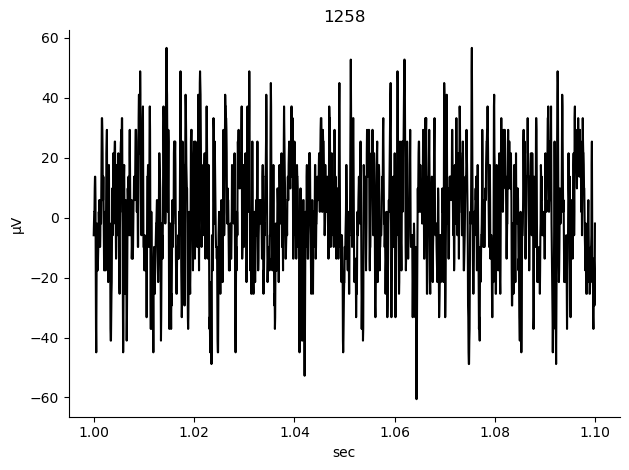

1.223073959350586


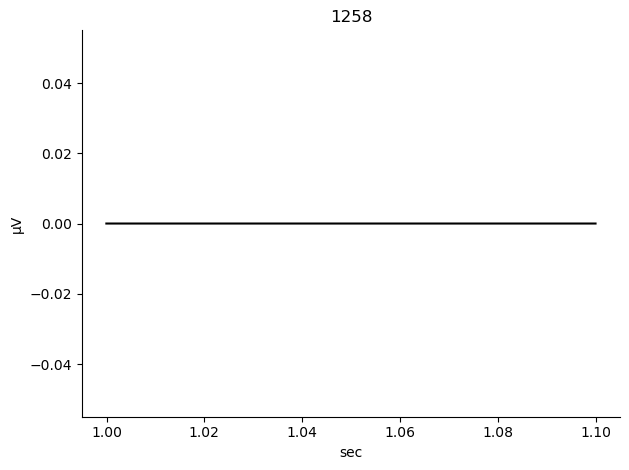

In [20]:
import time
import beaf.brw_recording as br

tstart = time.time()
Recording = br.read_brw_recording("../recordings/5s_rec_raw.brw", t_start=1, t_end=1.1, ch_to_extract=[1846, 2344, 214, 3984, 403, 1258, 2345, 3241], verbose=False, multiproc=False)
print(time.time()-tstart)
Recording.plot_raw([1258])

tstart = time.time()
Recording = br.read_brw_recording("../recordings/5s_rec_raw.brw", t_start=1, t_end=1.1, ch_to_extract=[1846, 2344, 214, 3984, 403, 1258, 2345, 3241], verbose=False, multiproc=True)
print(time.time()-tstart)
Recording.plot_raw([1258])

read time: 4.087 min
rec sampling: 19753.775390625
memory usage: 3.14 Go


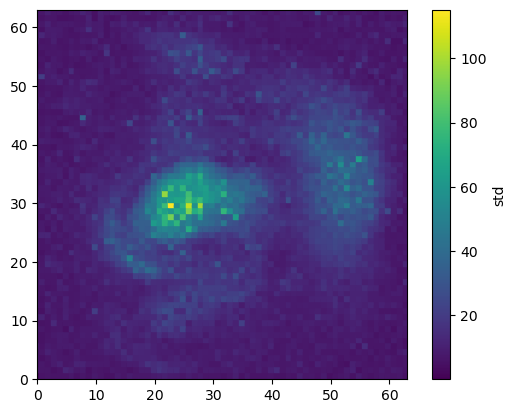

down sample save time: 0.001
raw load time: 0.018


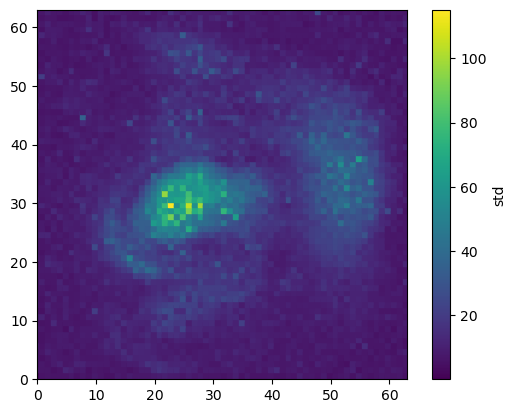

In [60]:
import time, psutil

if 'Recording' in locals():
    del(Recording)

mem_pre = np.round(psutil.virtual_memory().available / 1073741824, 2)

tstart = time.time()
Recording = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18, t_end=19)
print("read time:", np.round((time.time()-tstart)/60, 3), "min")
print("rec sampling:", Recording.Info.get_sampling_rate())
print("memory usage:", np.round(mem_pre-np.round(psutil.virtual_memory().available / 1073741824, 2), 2), "Go")

# tstart = time.time()
# Recording.save_recording("./rec_raw.pickle")
# print("raw save time:", np.round((time.time()-tstart)/60, 3))

Recording.down_sample(200, ch_to_process="all", overwrite=True)
Recording.plot_activity_map()

tstart = time.time()
Recording.save_recording("./rec_down-sample.pickle")
print("down sample save time:", np.round((time.time()-tstart)/60, 3))

del(Recording)

mem_pre = np.round(psutil.virtual_memory().available / 1073741824, 2)

# tstart = time.time()
# Recording = br.load_recording("./rec_raw.pickle")
# print("raw load time:", np.round((time.time()-tstart)/60, 3))
# print("memory usage:", np.round(mem_pre-np.round(psutil.virtual_memory().available / 1073741824, 2), 2), "Go")

tstart = time.time()
Recording = br.load_recording("./rec_down-sample.pickle")
print("raw load time:", np.round((time.time()-tstart)/60, 3))

Recording.plot_activity_map()

[[3700.0, 3719.0]]
[[3720.0, 3739.0]]
[ 0.55497641  1.82100137 -0.30184732 -1.88034134 -2.29273739 -4.06999217
  2.48660262 -4.15415099 -2.36611774  3.05245307  6.6778755  -0.8575461
  1.82270615  0.95046351  3.09465873  1.52466968  1.03735097  1.07719639
  0.6784756  -1.31094751]
[-2.6194112  -4.29450258  3.49710913  2.27257985 -1.34772348 -2.33297108
  0.13020443  4.69087868  2.18100779  2.02974374  3.16853066  2.36964097
 -2.24511136 -0.13662659 -2.31019415  1.98951549  4.10549617 -1.50281575
  3.42744568]
39
[ 0.55497641  1.82100137 -0.30184732 -1.88034134 -2.29273739 -4.06999217
  2.48660262 -4.15415099 -2.36611774  3.05245307  6.6778755  -0.8575461
  1.82270615  0.95046351  3.09465873  1.52466968  1.03735097  1.07719639
  0.6784756  -1.31094751 -2.6194112  -4.29450258  3.49710913  2.27257985
 -1.34772348 -2.33297108  0.13020443  4.69087868  2.18100779  2.02974374
  3.16853066  2.36964097 -2.24511136 -0.13662659 -2.31019415  1.98951549
  4.10549617 -1.50281575  3.42744568]
[[3700.

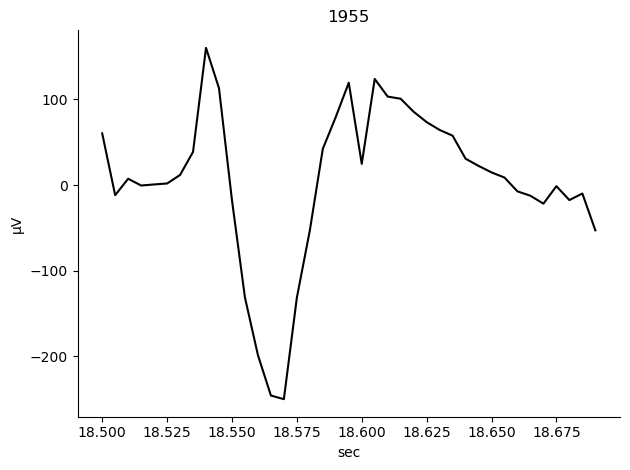

In [112]:
# print(Rec_a.Info.get_sampling_rate())

print(Rec_a.recording[0][2])
print(Rec_b.recording[0][2])

print(Rec_a.recording[0][1])
print(Rec_b.recording[0][1])

for ch_id in range(0, len(Rec_a.recording)):
    Rec_a.recording[ch_id][1] = np.concatenate((Rec_a.recording[ch_id][1], Rec_b.recording[ch_id][1]))
    Rec_a.recording[ch_id][2] = [[Rec_a.recording[ch_id][2][0][0], Rec_b.recording[ch_id][2][0][1]]]

print(len(Rec_a.recording[ch_id][1]))
# for ch_id in range(0, len(Rec_a.recording)):
#     Rec_a.recording[ch_id][1] = [list(Rec_a.recording[ch_id][1]), list(Rec_b.recording[ch_id][1])]
#     Rec_a.recording[ch_id][2].append(Rec_b.recording[ch_id][2][0])

print(Rec_a.recording[0][1])
print(Rec_a.recording[0][2])


Rec_a.plot_raw([1955])

segment read time: 3.85 min
segment read time: 3.595 min
merge time: 0.017003536224365234 sec
segment read time: 3.634 min
merge time: 0.01491546630859375 sec
segment read time: 3.391 min
merge time: 0.01600050926208496 sec
segment read time: 3.175 min
merge time: 0.017911672592163086 sec
segment read time: 3.109 min
merge time: 0.01600790023803711 sec
segment read time: 3.118 min
merge time: 0.013000011444091797 sec
segment read time: 3.116 min
merge time: 0.017002105712890625 sec
segment read time: 3.112 min
merge time: 0.016000747680664062 sec
segment read time: 3.117 min
merge time: 0.01799798011779785 sec
segment read time: 3.107 min
merge time: 0.028918027877807617 sec
segment read time: 3.064 min
merge time: 0.019998788833618164 sec
segment read time: 3.034 min
merge time: 0.020000219345092773 sec
segment read time: 3.033 min
merge time: 0.023000478744506836 sec
segment read time: 3.05 min
merge time: 0.02399611473083496 sec
segment read time: 3.027 min
merge time: 0.02299857139

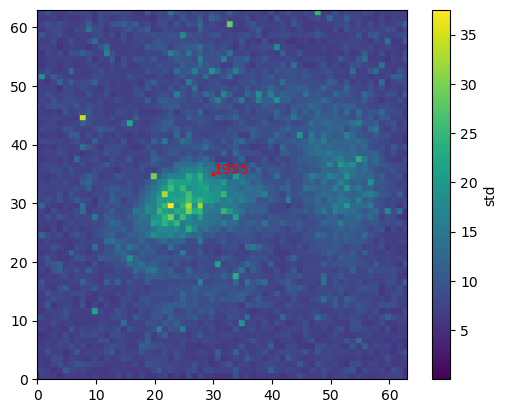

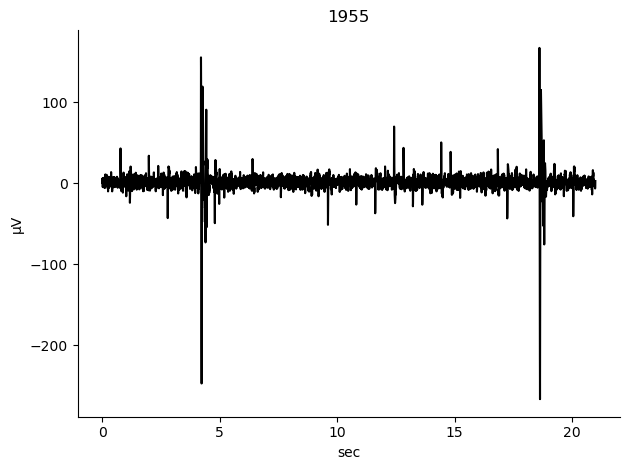

In [140]:
import time

ttstart = time.time()

tstart = time.time()
Rec_a = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=0, t_end=1)
print("segment read time:", np.round((time.time()-tstart)/60, 3), "min")

Rec_a.down_sample(200, ch_to_process="all", overwrite=True)

for i in range(1, 21):
    tstart = time.time()
    Rec_b = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=i, t_end=i+1)
    print("segment read time:", np.round((time.time()-tstart)/60, 3), "min")
    Rec_b.down_sample(200, ch_to_process="all", overwrite=True)
    
    tstart = time.time()
    Rec_a.merge_recordings(Rec_b)
    print("merge time:", time.time()-tstart, "sec")

Rec_a.save_recording("./Rec_conc.pickle")
print("--------\ntotal execution time:", np.round((time.time()-ttstart)/60, 3), "min")

Rec_a.plot_activity_map(label=[1955])
Rec_a.plot_raw([1955])

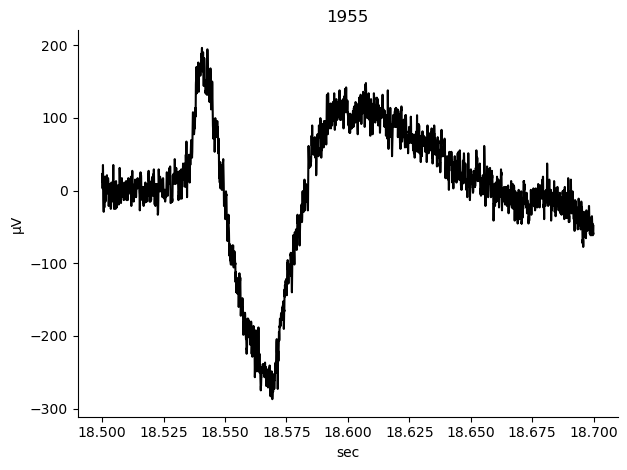

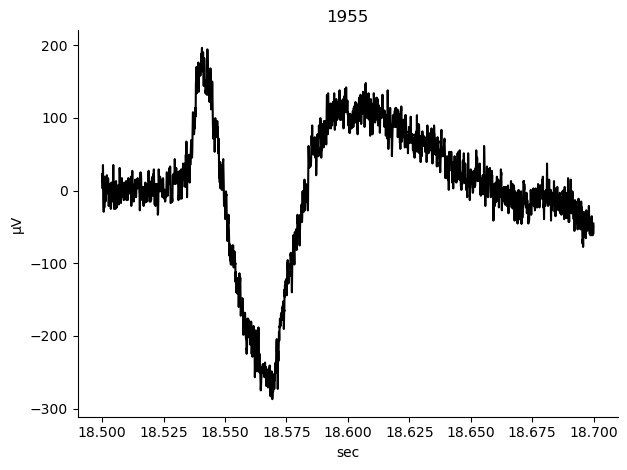

In [137]:
# Rec_a = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18.5, t_end=18.6)
# Rec_a.down_sample(200, ch_to_process="all", overwrite=True)
# Rec_a.save_recording("./Rec_a.pickle")

# Rec_b = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18.6, t_end=18.7)
# Rec_b.down_sample(200, ch_to_process="all", overwrite=True)
# Rec_b.save_recording("./Rec_b.pickle")

# Rec_a = br.load_recording("./Rec_a.pickle")
# Rec_b = br.load_recording("./Rec_b.pickle")

Rec_a = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18.5, t_end=18.6, ch_to_extract=[1955])
Rec_b = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18.6, t_end=18.7, ch_to_extract=[1955])

Rec_a.merge_recordings(Rec_b)
del(Rec_b)
Rec_a.plot_raw([1955])

Rec_c = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=18.5, t_end=18.7, ch_to_extract=[1955])
# Rec_c.down_sample(200, ch_to_process=[1955], overwrite=True)
Rec_c.plot_raw([1955])

Reading Chunk number 0 out of 20
Reading Chunk number 1 out of 20
Reading Chunk number 2 out of 20
Reading Chunk number 3 out of 20
Reading Chunk number 4 out of 20
Reading Chunk number 5 out of 20
Reading Chunk number 6 out of 20
Reading Chunk number 7 out of 20
Reading Chunk number 8 out of 20
Reading Chunk number 9 out of 20
Reading Chunk number 10 out of 20
Reading Chunk number 11 out of 20
Reading Chunk number 12 out of 20
Reading Chunk number 13 out of 20
Reading Chunk number 14 out of 20
Reading Chunk number 15 out of 20
Reading Chunk number 16 out of 20
Reading Chunk number 17 out of 20
Reading Chunk number 18 out of 20
Reading Chunk number 19 out of 20
process time: 365.371 sec


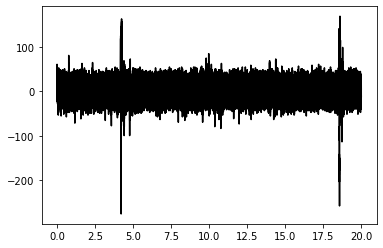

In [75]:
import clr, os, time
import numpy as np
import matplotlib.pyplot as plt

clr.AddReference(os.path.join("C:\\Program Files\\3Brain\\BrainWave 5", "3Brain.BrainWave.IO.dll"))
clr.AddReference(os.path.join("C:\\Program Files\\3Brain\\BrainWave 5", "3Brain.BrainWave.Common.dll"))

from System import Int32, Double, Boolean

from _3Brain.BrainWave.IO import BrwFile
from _3Brain.BrainWave.Common import (MeaFileExperimentInfo, RawDataSettings,
                                      ExperimentType, MeaPlate)
from _3Brain.Common import (MeaPlateModel, MeaChipRoi, MeaDataType)

idxChToExtract = [] # index of the channels to extract (0-based)
for i in range(4096):
    idxChToExtract.append(i)
start = 0 # instant from where to start extracting [sec]
intervalToExtract = 20 # length in sec of the interval to extract

chToExtract = []
for i in range(4096):
    chToExtract.append([])

consumer = object()
data = BrwFile.Open("../recordings/hippo_slice3-gabazine11.brw")

info = data.get_MeaExperimentInfo()
frameRate = float(info.get_SamplingRate())
minAnalogValue = float(info.get_MinAnalogValue())
maxAnalogValue = float(info.get_MaxAnalogValue())
minDigitalValue = int(info.get_MinDigitalValue())
maxDigitalValue = int(info.get_MaxDigitalValue())

frameChunck = frameRate # number of frames to extract at every reading file cycle

chToExtract = []
for i in idxChToExtract:
    chToExtract.append([])

startFrame = np.floor(start * info.get_SamplingRate())
endFrame = startFrame + np.floor(intervalToExtract * info.get_SamplingRate())
numReading = int(np.floor(intervalToExtract * info.get_SamplingRate() / frameChunck))

# tmp = data.ReadRawData(0, 16384, data.get_SourceChannels(), consumer)
tstart = time.time()
cN = 1
tmp = []
for cnk in range(numReading):
    print('Reading Chunk number %s out of %s' %(cnk, numReading))
    tmp = data.ReadRawData(int(startFrame + cnk * frameChunck), frameChunck, data.get_SourceChannels(), consumer)
    # tmp is a 3D array, first index is the well number (in case of mutliwells, for single chip there will be only one well),
    # the second index is the channel, the third index the time frame
    for i in range(len(idxChToExtract)):
        ext = np.fromiter(info.DigitalToAnalog(tmp[0][idxChToExtract[i]]), float) # here values are converted in voltage
        chToExtract[i].append(ext) # it contains a list of arrays of data one for each read chunck

    cN = cN + 1
print("process time:", np.round((time.time()-tstart), 3), "sec")
# Close Files
data.Close()


for chunk in range(len(chToExtract[1955])):
    plt.plot([(x+(int(frameChunck)*chunk))/frameRate for x in range(int(frameChunck))], chToExtract[1955][chunk], c='black')

plt.show()

# if 'chToExtract' in locals():
#     del(chToExtract)

All channels
Reading chunk 4 out of 4
done
process time using dll: 341.714 sec


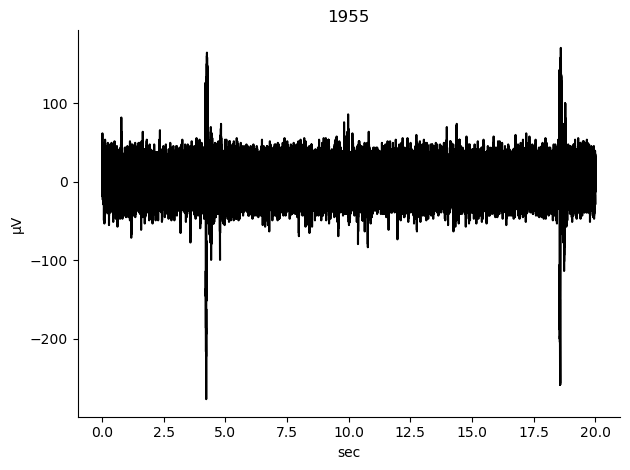

Reading chunk 16 out of 16
done
process time using dll: 407.11 sec


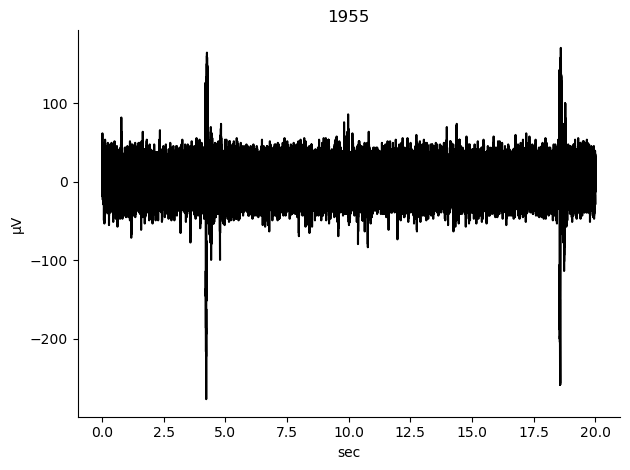

Reading chunk 40 out of 40
done
process time using dll: 485.662 sec


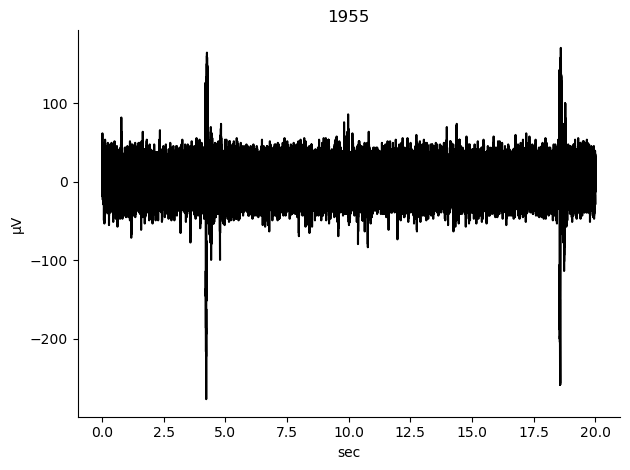

In [153]:
import matplotlib.pyplot as plt
%reload_ext autoreload
import beaf.brw_recording as br

import time
import numpy as np

if 'Rec' in locals():
    del(Rec)

t_start = 0
t_end = 20

print("All channels")

tstart = time.time()
Rec = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=t_start, t_end=t_end, ch_to_extract="all", frame_chunk=100000, verbose=True, use_dll=True)
print("process time using dll:", np.round((time.time()-tstart), 3), "sec")
Rec.plot_raw([1955])

if 'Rec' in locals():
    del(Rec)

tstart = time.time()
Rec = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=t_start, t_end=t_end, ch_to_extract="all", frame_chunk=25000, verbose=True, use_dll=True)
print("process time using dll:", np.round((time.time()-tstart), 3), "sec")
Rec.plot_raw([1955])

if 'Rec' in locals():
    del(Rec)

tstart = time.time()
Rec = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=t_start, t_end=t_end, ch_to_extract="all", frame_chunk=10000, verbose=True, use_dll=True)
print("process time using dll:", np.round((time.time()-tstart), 3), "sec")
Rec.plot_raw([1955])

if 'Rec' in locals():
    del(Rec)


In [24]:
%load_ext autoreload
%autoreload 2

import beaf.brw_recording as br

import matplotlib.pyplot as plt
import numpy as np
import time


print("all channels, 2 sec")

x=[]
y_mean=[]
y_std=[]

for i in range(1, 40):

    frame_chunk = i * 1000
    y=[]
    for repetition in range(6):
        if 'Rec' in locals():
            del(Rec)

        tstart = time.time()
        Rec = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=0, t_end=2, ch_to_extract="all", frame_chunk=frame_chunk, verbose=False, use_dll=True)
        y.append(np.round((time.time()-tstart), 3))

    x.append(frame_chunk)
    y_mean.append(np.average(y))
    y_std.append(np.std(y))

plt.rcdefaults()
plt.figure()
plt.errorbar(x, y_mean, yerr=y_std)
plt.show()


print("single channel, 20 sec")

x=[]
y_mean=[]
y_std=[]

for i in range(1, 250):

    frame_chunk = i * 1000
    y=[]
    for repetition in range(6):
        if 'Rec' in locals():
            del(Rec)

        tstart = time.time()
        Rec = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=0, t_end=20, ch_to_extract=[1955], frame_chunk=frame_chunk, verbose=False, use_dll=True)
        y.append(np.round((time.time()-tstart), 3))

    x.append(frame_chunk)
    y_mean.append(np.average(y))
    y_std.append(np.std(y))

plt.rcdefaults()
plt.figure()
plt.errorbar(x, y_mean, yerr=y_std)
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
all channels, 2 sec


KeyboardInterrupt: 

In [92]:
import importlib

%load_ext autoreload
%autoreload 2

import beaf.brw_recording as br
import beaf.brw_experiment_settings as be
import beaf.utils as bu

# Info = be.get_brw_experiment_setting("../recordings/cortex_slice2.brw")

Rec = br.read_brw_recording("../recordings/cortex_slice2.brw", t_start=430, t_end=470, ch_to_extract="all", use_dll=True)

# list_idx = []
# for i in range(Rec.Info.get_nb_channel()):
#     if Rec.recording[i][1]:
#         list_idx.append(i)
# print(len(list_idx))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
41 data chunks to read


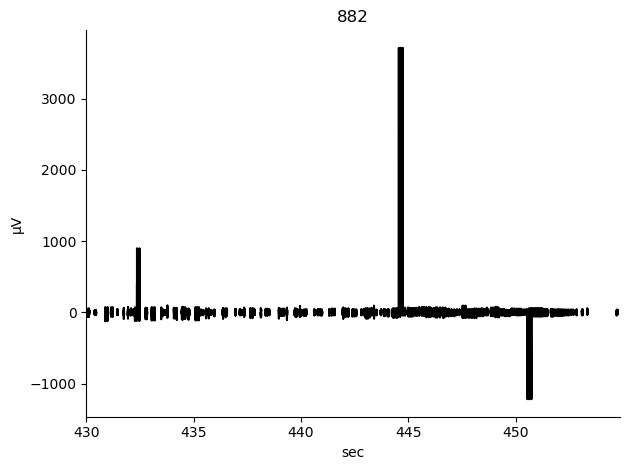

278


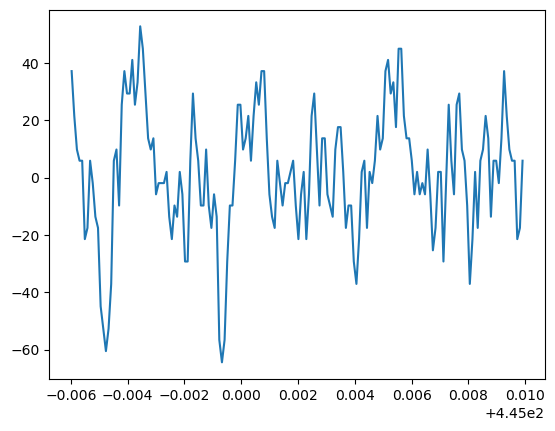

In [244]:
import matplotlib.pyplot as plt


ch_x = 13
ch_y = 50

# Rec.plot_activity_map(label=[bu.get_ch_number(ch_x, ch_y)])

# Rec.plot_raw(t_start=432, t_end=435, ch_to_display=[bu.get_ch_number(ch_x, ch_y)], visualisation="continuous")
# Rec.plot_raw(t_start=433, t_end=434, ch_to_display=[bu.get_ch_number(ch_x, ch_y)], visualisation="continuous")

# Rec.plot_raw(t_start=433, t_end=434, ch_to_display=[bu.get_ch_number(ch_x, ch_y)], visualisation="superimposed")

ch = bu.get_ch_number(ch_x, ch_y)
ch_id = 0
for idx in range(Rec.Info.get_nb_channel()):
    if Rec.recording[idx][0] == ch:
        ch_id = idx

# plt.plot(Rec.recording[ch_id][1])

Rec.plot_raw(t_start=430, ch_to_display=[bu.get_ch_number(ch_x, ch_y)], visualisation="aligned")

print(len(Rec.recording[ch_id][2]))

snip_id = 141
if snip_nb == 0:
    snip_start = 0
else:
    snip_start = Rec.recording[ch_id][2][snip_id-1][1]-Rec.recording[ch_id][2][snip_id-1][0]
snip_stop = snip_start + Rec.recording[ch_id][2][snip_id][1] - Rec.recording[ch_id][2][snip_id][0]

# print(snip_start, snip_stop)
# print(Rec.recording[ch_id][2][snip_id])
# print(Rec.Info.get_sampling_rate())



plt.plot([x/Rec.Info.get_sampling_rate() for x in range(Rec.recording[ch_id][2][snip_id][0], Rec.recording[ch_id][2][snip_id][1])], Rec.recording[ch_id][1][snip_start:snip_stop])



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


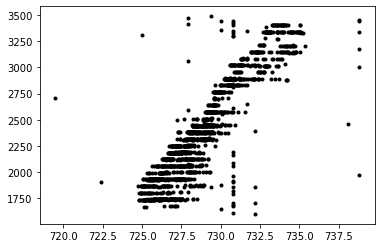

In [8]:
import importlib

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import beaf.bxr_experiment_settings as bxe
import beaf.bxr_recording as bxr

Info = bxe.get_bxr_experiment_setting("../recordings/cortex_slice2.bxr")

Info.get_recording_length_sec()


Rec = bxr.read_bxr_file("../recordings/retina-P5-waves.bxr", t_start = 722, t_end = 739, ch_to_extract=[ch for ch in range(1600, 3500)], sort = True)

for ch in range(0, Rec.Info.get_nb_channel()):
    plt.plot([s/Rec.Info.get_sampling_rate() for s in Rec.sorted[ch]], [ch for x in range(0, len(Rec.sorted[ch]))], '.', c='black')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


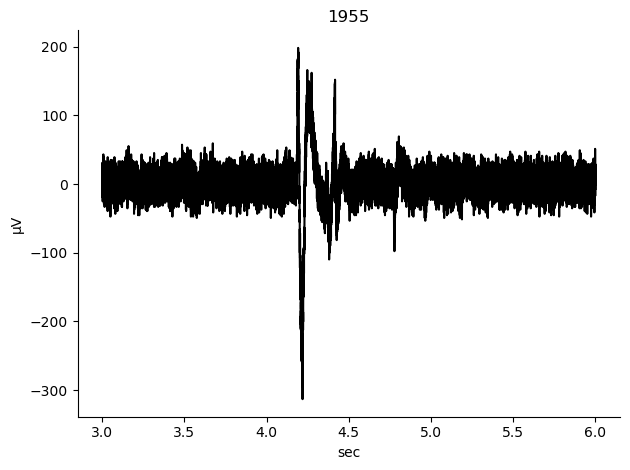

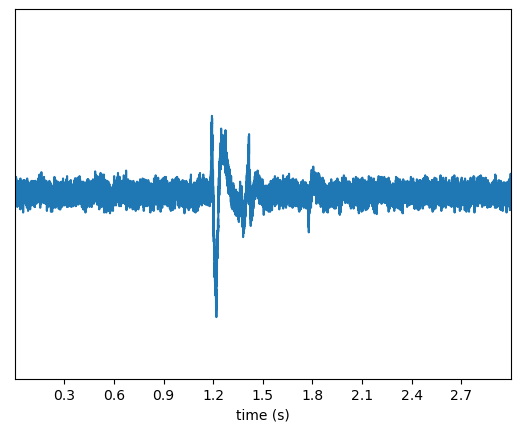

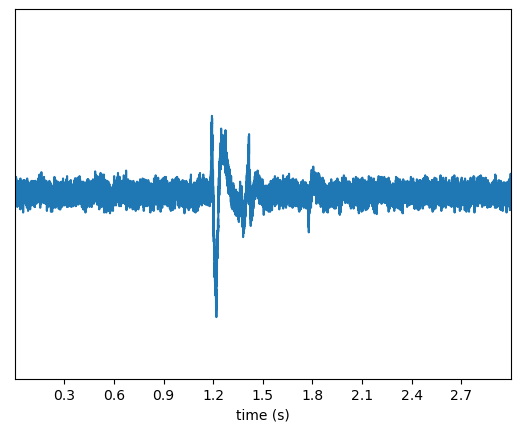

In [32]:
%load_ext autoreload
%autoreload 2

import spikeinterface.widgets as sw

import beaf.brw_recording as br
import beaf.brw_spikeinterface as bsi

Rec = br.read_brw_recording("../recordings/hippo_slice3-gabazine11.brw", t_start=3, t_end=6, ch_to_extract=[1955])
Rec.plot_raw([1955])

SIR = bsi.read_brw_SpikeInterface("../recordings/hippo_slice3-gabazine11.brw", t_start=3, t_end=6, ch_to_extract=[1955])
sw.plot_timeseries(SIR, time_range=(0, 3))

SIR_convert = bsi.get_spikeinterface_recording(Rec)
sw.plot_timeseries(SIR_convert, time_range=(0, 3))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
process time without dll: 2.273 sec
process time with dll: 1.939 sec


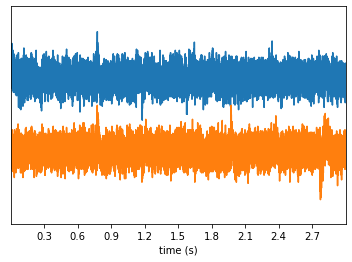

In [3]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import spikeinterface.widgets as sw
import beaf.brw_spikeinterface as bsi


tstart = time.time()
SIR = bsi.read_brw_SpikeInterface("../recordings/hippo_slice3-gabazine11.brw", t_start=0, t_end=10, ch_to_extract=[1955, 1954])
print("process time without dll:", np.round((time.time()-tstart), 3), "sec")

tstart = time.time()
SIR = bsi.read_brw_SpikeInterface("../recordings/hippo_slice3-gabazine11.brw", t_start=0, t_end=10, ch_to_extract=[1955, 1954], use_dll=True)
print("process time with dll:", np.round((time.time()-tstart), 3), "sec")

sw.plot_timeseries(SIR, time_range=(0, 3))